In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

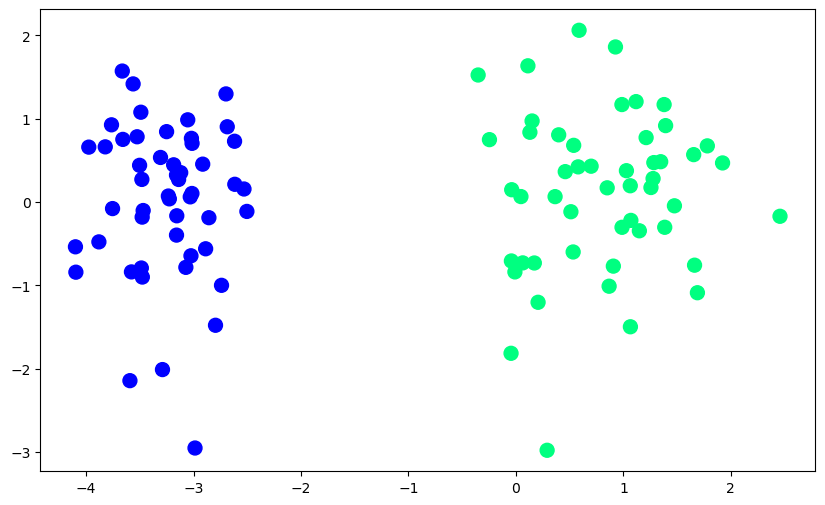

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Sklearn Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty = None, solver = 'sag')
lor.fit(X,y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [5]:
print(lor.coef_)
print(lor.intercept_)

[[4.86297631 0.2284154 ]]
[5.82663833]


In [6]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [8]:
X

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

In [9]:
np.insert(X,0,1,axis  = 1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [10]:
X1 = np.insert(X,0,1,axis=1)
np.ones(X1.shape[1])

array([1., 1., 1.])

In [11]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y - y_hat), X) / X.shape[0])
        
    return weights[1:],weights[0]

In [12]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [13]:
coef_,intercept_ = gd(X,y)

In [14]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [15]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

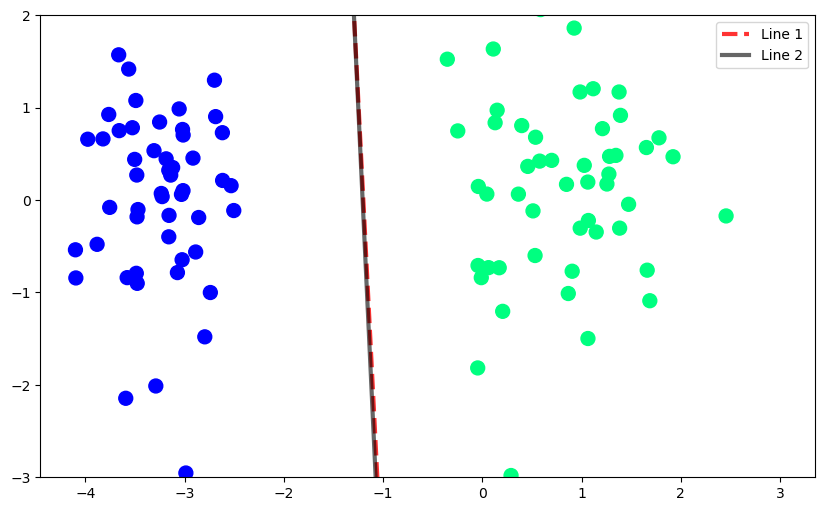

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3, label='Line 1', linestyle='--', alpha=0.8)
plt.plot(x_input1, y_input1, color='black', linewidth=3, label='Line 2', alpha=0.6)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()

In [17]:
print("Line 1 slope (m):", m, "intercept (b):", b)
print("Line 2 slope (m1):", m1, "intercept (b1):", b1)  # If defined separately

Line 1 slope (m): -22.84586207917221 intercept (b): -27.53903541191917
Line 2 slope (m1): -21.29005460056906 intercept (b1): [-25.50895588]


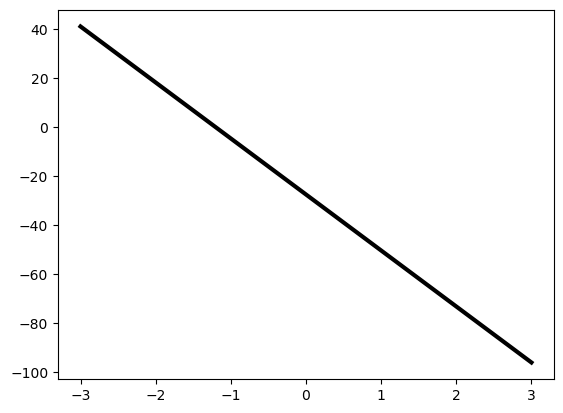

In [18]:
plt.plot(x_input1, y_input1 + 0.1, color='black', linewidth=3, label='Line 2 (offset)')